# Moisture index analysis and color detection using Machine Learning 

#### source: https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (957, 1920, 3)


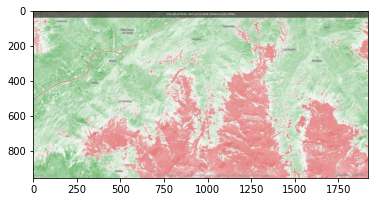

In [2]:
# Example of data source
datasource = 'data/water_index_images/2021-03-10-00_00_2021-03-10-23_59_Sentinel-2_L2A_NDWI.jpg'

image = cv2.imread(datasource)

print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

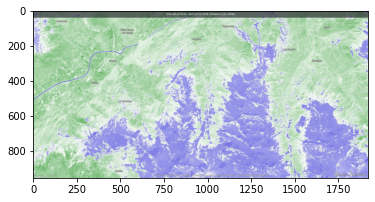

In [3]:
# Original colors

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

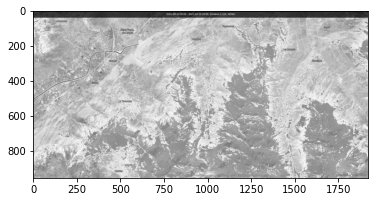

In [4]:
# Black and white colors
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Machine Learning 

#### KMeans is used to first fit and then predict on the image to get the color results. The cluster of colors is identified and plotted as a pie chart.  Here the color abundance in the printed output of `get_colors` represents the areas with most water.

In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image



def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    count_total = 0 
    for element in counts.values():
        count_total += element
    rgb_ratios_to_total = []
    for i in counts.values():
        ratio = float(i)/count_total
        rgb_ratios_to_total.append(ratio)
        #print("Ratio of color to total: ",ratio)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
      for i in range(len(counts.keys())):
        print("Color: ", hex_colors[i], " color abundance: ", rgb_ratios_to_total[i])

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
    return rgb_colors



Color:  #bedebe  color abundance:  0.167725
Color:  #9494e6  color abundance:  0.20971666666666666
Color:  #55625c  color abundance:  0.03897916666666667
Color:  #e4eee9  color abundance:  0.1225
Color:  #92c592  color abundance:  0.0737125
Color:  #aad4aa  color abundance:  0.15250833333333333
Color:  #b6b8e4  color abundance:  0.07390416666666667
Color:  #d1e5d4  color abundance:  0.16095416666666668


[array([190.03930109, 222.38614132, 190.11655923]),
 array([148.04834999, 148.10746867, 230.5368277 ]),
 array([85.88808124, 98.84425441, 92.08669161]),
 array([228.24177018, 238.5252155 , 233.69011742]),
 array([146.45311175, 197.10898197, 146.38550675]),
 array([170.48016502, 212.26397465, 170.2741107 ]),
 array([182.11172616, 184.32518075, 228.39990962]),
 array([209.4365102 , 229.838055  , 212.89199347])]

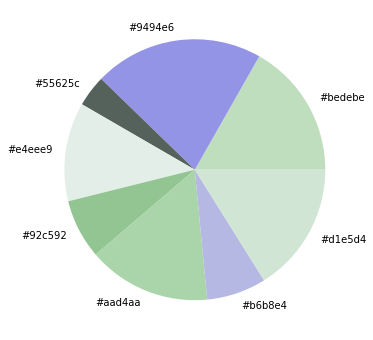

In [6]:
get_colors(get_image(datasource), 8, True)

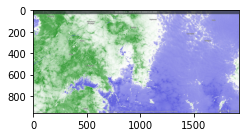

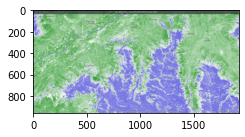

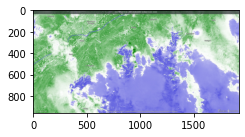

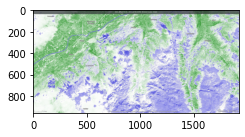

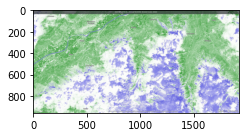

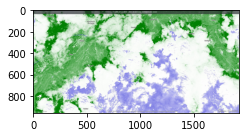

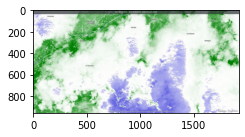

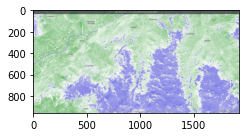

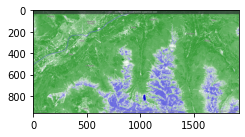

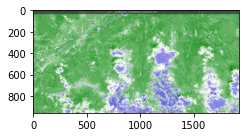

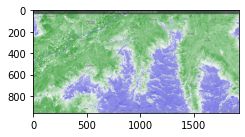

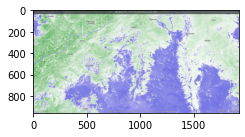

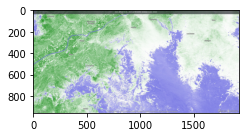

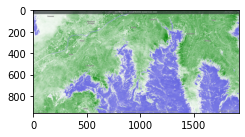

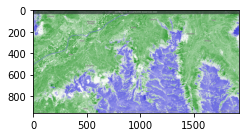

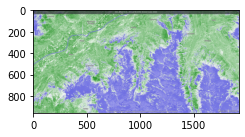

In [7]:
IMAGE_DIRECTORY = 'data/water_index_images/'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
        
for i in range(len(images)):
    plt.figure(figsize=(70, 50))
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    get_colors(images[i], 8, False)
        